<div style="background:#FFFFEE; color:#440404; padding:8px; border-radius: 4px; text-align: center; font-weight: 500;">IFN619 - Data Analytics for Strategic Decision Makers (2024 Sem 1)</div>

# IFN619 :: UA2 - Extending Analytics (40%)

**IMPORTANT:** Refer to the instructions in Canvas [UA2 - Assignment 2 - extending analytics](https://canvas.qut.edu.au/courses/17432/assignments/163774) *BEFORE* working on this assignment.

#### REQUIREMENTS ####

1. Complete and run the code cell below to display your name, student number, and assignment option
2. Identify an appropriate question (or questions) to be addressed by your overall data analytics narrative
3. Extend your analysis in assignment 1 with:
    - the analysis of additional unstructured data using the Guardian API (See accessing the Guardian API notebook),
    - the use of one machine learning technique (as used in the class materials), and
    - identification of ethical considerations relevant to the analysis (by drawing on class materials).
4. Ensure that you include documentation of your thinking and decision-making using markdown cells
5. Ensure that you include appropriate visualisations, and that they support the overall narrative
6. Ensure that your insights answer your question/s and are appropriate to your narrative. 
7. Ensure that your insights are consistent with the ethical considerations identified.

**NOTE:** you should not repeat the analysis from assignment 1, but you may need to save dataframes from assignment 1 and reload for use in this assignment. You may also summarise your assignment 1 insights as part of the process of identifying questions for analysis.

#### SUBMISSION ####

1. Create an assignment 2 folder named in the form **UA2-surname-idnumber** and put your notebook and any data files inside this folder. Note, do not put large training data in this folder (reference any training data that you used but keep it outside this folder), only keep small data files and models in this folder with your notebook.
2. When you have everything in the correct folder, reset all cells and restart the kernel, then run the notebook completely, checking that all cells have run without error. If you encounter errors, fix your notebook and re-run the process. It is important that your notebook runs without errors only requiring the files in the folder that you have created.
3. When the notebook is error free, zip the entire folder (you can select download folder in Jupyter).
4. Submit the zipped folder on Canvas [UA2 - Assignment 2 - extending analytics](https://canvas.qut.edu.au/courses/17432/assignments/163774)


In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.display import HTML

# personal details
first_name =  "Nima"
last_name = "Ghamari"
student_number = "N11528915"

personal_header = f"<h1>{first_name} {last_name} ({student_number})</h1>"
HTML(personal_header)

---


# what my question is?

### Is the percentage of funds dedicated only to women, same as what it has been talkied in the media and is there an ethical fairness in funding consideration? and is it going to increase by the previous pattern?

In this extended analysis, I will address a question I found in the Advance Queensland dataset. I discovered that some parts of the funding are specifically allocated to women. By calculating data from the first datasets, I determined the percentage of funds dedicated to women in the Advance Queensland program. Additionally, I examined how much this funding is discussed in the news and media.

Ultimately, my analysis will assess whether stakeholders, such as the government and media, are adequately addressing the topic of funding for women. Is the funding dedicated to women fair compared to similar programs in the US and Australia? Do we need to increase or decrease this funding, and how should it be addressed?

I will use machine learning and ethical considerations to analyze the language used in discussions about these funds and their allocation to women.

In [2]:
import pandas as pd

# URL to the CSV file
url = 'https://www.data.qld.gov.au/dataset/db190f2d-f866-4811-9a6e-4b78744b551b/resource/0f97b985-f5c7-49d2-8b0a-bc5dfbe070b9/download/advance-queensland-funding-recipients.csv'

# Read the CSV file
funding = pd.read_csv(url, encoding='cp1252')  # Adjust encoding based on your data source specifics

# Displaying the first few entries of the dataframe to understand its structure
print(funding.head())

# Note the columns
print(funding.columns)
funding['Actual Contractual Commitment ($)'] = funding['Actual Contractual Commitment ($)'].str.replace(',','')
funding['Actual Contractual Commitment ($)'] = funding['Actual Contractual Commitment ($)'].astype('float64')

                                             Program  \
0  Aboriginal and Torres Strait Islander PhD Scho...   
1  Aboriginal and Torres Strait Islander PhD Scho...   
2  Aboriginal and Torres Strait Islander Research...   
3  Aboriginal and Torres Strait Islander Research...   
4              Advancing Regional Innovation Program   

                                              Round   \
0  AQ Aboriginal & Torres Strait Islander PhD Sch...   
1  AQ Aboriginal & Torres Strait Islander PhD Sch...   
2  AQ Aboriginal & Torres Strait Islander Researc...   
3  AQ Aboriginal & Torres Strait Islander Researc...   
4      AQ Advancing Regional Innovation Full 2016-17   

                        Recipient Name  \
0        Central Queensland University   
1                  Griffith University   
2  Queensland University of Technology   
3                                CSIRO   
4                 Redland City Council   

  Physical Address of Recipient - Suburb/Location  \
0                   

Justification:
> now running the same code as the previous assignment and making the actual contractual commitment which is the amount of funding in a readable format

In [3]:
funding

,Program,Round,Recipient Name,Physical Address of Recipient - Suburb/Location,Physical Address of Recipient - Post Code,University Collaborator (if applicable),Other Partners; Collaborators (if applicable),Investment/Project Title,Primary Location of Activity/Project - Suburb,Primary Location of Activity/Project - Post Code,Multiple Locations of Activity/Project (if applicable),Approval date,Local Government /Council,RAP Region,State Electorate,Actual Contractual Commitment ($)
0,Aboriginal and Torres Strait Islander PhD Scho...,AQ Aboriginal & Torres Strait Islander PhD Sch...,Central Queensland University,Norman Gardens,4701.0,NaN,BHP Billiton,Decolonising the systematic barriers and enabl...,Brisbane City,4001.0,NaN,14/06/2019,Rockhampton (R),Brisbane and Redlands,Keppel,107084.0
1,Aboriginal and Torres Strait Islander PhD Scho...,AQ Aboriginal & Torres Strait Islander PhD Sch...,Griffith University,Nathan,4111.0,NaN,NaN,An indigenous journey through the 21st century...,Nathan,4111.0,NaN,28/01/2016,Brisbane (C),Brisbane and Redlands,Toohey,117500.0
2,Aboriginal and Torres Strait Islander Research...,AQ Aboriginal & Torres Strait Islander Researc...,Queensland University of Technology,Brisbane City,4000.0,NaN,Engineered Wood Products Association Australa...,An Innovative Framing System for Taller Timber...,Brisbane City,4000.0,NaN,21/08/2018,Brisbane (C),Brisbane and Redlands,McConnel,240000.0
3,Aboriginal and Torres Strait Islander Research...,AQ Aboriginal & Torres Strait Islander Researc...,CSIRO,Smithfield,4878.0,NaN,CSIRO,Transforming hidden data: An integrative infor...,Smithfield,4878.0,NaN,28/01/2016,Cairns (R),Far North Queensland,Barron River,158032.0
4,Advancing Regional Innovation Program,AQ Advancing Regional Innovation Full 2016-17,Redland City Council,Cleveland,4163.0,NaN,Community Information Support Services Ltd \n...,Growing innovation in the Redlands and Logan r...,Cleveland,4163.0,"Meadowbrook, Alexandra Hills, Springwood",21/09/2017,Redland (C),Brisbane and Redlands,Oodgeroo,500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Young Starters' Fund,AQ Young Starters Fund Round 2015-16 Round 5,Griffith University,Southport,4215.0,NaN,NaN,Mentor Revolution – Get Started - YGSTRS-49249...,Southport,4215.0,University of Queensland - St Lucia,21/06/2016,Gold Coast (C),Gold Coast,Bonney,19226.0
1335,Young Starters' Fund,AQ Young Starters Fund Round 2015-16 Round 5,Fifty Six Creations Pty Ltd - Mt Gravatt,Upper Mount Gravatt,4122.0,NaN,NaN,Fiftysix Academy and Advance Queensland in Mac...,Mackay,4740.0,NaN,21/06/2016,Brisbane (C),Mackay-Whitsunday,Mansfield,20000.0
1336,Young Starters' Fund,AQ Young Starters Fund Round 2016-17 Round 1,South Bank Business Association Incorporated,South Brisbane,4101.0,NaN,NaN,The Big 5 - 5 Big Learnings from Industry Experts,South Brisbane,4101.0,NaN,28/07/2016,Brisbane (C),Brisbane and Redlands,South Brisbane,7500.0
1337,Young Starters' Fund,AQ Young Starters Fund Round 2015-16 Round 5,Time Masters (Australia) Pty Limited,Runaway Bay,4216.0,NaN,NaN,Open Your Eyes to Cash - Logan - YGSTRS-479994...,Loganholme,4129.0,Logan,21/06/2016,Gold Coast (C),Logan,Broadwater,10350.0


In [4]:
funding.to_csv("advance QLD.csv")

Justification:
> learning the data from which I have named funding and then making it to the CSV file tto reading better in the future.

looking for women words in a text:

In [5]:
# List of keywords to search for
keywords = ['woman', 'women', 'feminine', 'female' , 'girl']
# Filter the rows where any cell contains any of the keywords (case-insensitive)
OnlyWomen = funding[funding.apply(lambda row: row.astype(str).str.contains('|'.join(keywords), case=False).any(), axis=1)]

# Display the filtered data
OnlyWomen.to_csv('only woman.csv')

Justification:
> now in this part for the first time I'm looking forward to some keywords which including similarity to women and making a new data set calling OnlyWomen which makes only for specific words. beside that I have read the whole dataset, including the whole program name and the details and I haven't found anything else in the cells that is going to be mentioned about woman.

In [6]:
OnlyWomen

,Program,Round,Recipient Name,Physical Address of Recipient - Suburb/Location,Physical Address of Recipient - Post Code,University Collaborator (if applicable),Other Partners; Collaborators (if applicable),Investment/Project Title,Primary Location of Activity/Project - Suburb,Primary Location of Activity/Project - Post Code,Multiple Locations of Activity/Project (if applicable),Approval date,Local Government /Council,RAP Region,State Electorate,Actual Contractual Commitment ($)
76,Female Founders Program,NaN,Advisory Board Centre Pty Ltd,Brisbane City,4000.0,NaN,NaN,Provision of Innovation Services Contract No. ...,Brisbane City,4000.0,NaN,4/03/2023,Brisbane (C),Brisbane,McConnel,76500.0
77,Female Founders Program,NaN,Impact Innovation Group Pty Ltd,Brisbane City,4000.0,NaN,NaN,Provision of Innovation Services Contract No. ...,Brisbane City,4000.0,NaN,5/03/2019,Brisbane (C),Brisbane,McConnel,1452855.0
78,Female Founders Program,Round 1,SBE Australia Limited,"Bondi Junction, NSW",NaN,NaN,NaN,SBE Evolve,Fortitude Valley,4006.0,NaN,22/09/2021,NonQueensland,Brisbane,NonQueensland,30000.0
79,Female Founders Program,Scrunch Program,Scrunch Enterprises Pty Ltd,West End,4101.0,NaN,NaN,Female Founders Scrunch Program,West End,4101.0,NaN,7/08/2020,Brisbane (C),Brisbane,South Brisbane,95409.0
456,Ignite Ideas Fund,AQ Ignite Ideas Fund 2016-17 Round 2,Bivacor Pty Ltd,Wilston,4051.0,NaN,NaN,Development of a wearable patient controller f...,Wilston,4051.0,NaN,9/03/2017,Brisbane (C),Brisbane and Redlands,Stafford,250000.0
634,Industry Research Fellowships,AQ Industry Research Fellowships 2020 R3-COVID-19,Queensland University of Technology - Translat...,Woolloongabba,4102.0,NaN,Metro South Hospital and Health Service - Pri...,Preventing the respiratory failure causing COV...,Woolloongabba,4102.0,"Princess Alexandra Hospital, Woolloongabba, Qu...",16/07/2020,Brisbane (C),Brisbane and Redlands,South Brisbane,150000.0
653,Industry Research Fellowships,AQ Industry Research Fellowships 2020 R3-COVID-19,Queensland University of Technology,Brisbane City,4000.0,NaN,Panda Healthcare Pty Ltd \n Metro North Hospi...,Antiviral and antibacterial surfaces using nan...,Brisbane City,4000.0,"Panda Healthcare Pty Ltd (Bonogin, QLD), Royal...",16/07/2020,Brisbane (C),Brisbane and Redlands,McConnel,120000.0
676,Industry Research Fellowships,AQ Industry Research Fellowships 2020 R3-COVID-19,The University of Queensland - RBWH - Herston,Herston,4029.0,NaN,The Royal Brisbane and Women's Hospital \n Pr...,Automating Infectious Disease Surveillance wit...,Herston,4029.0,NaN,16/07/2020,Brisbane (C),Brisbane and Redlands,Maiwar,300000.0
700,Industry Research Fellowships,AQ Industry Research Fellowships 2018 Round 1,Queensland University of Technology,Kelvin Grove,4059.0,NaN,Metro North Hospital and Health Service - Roy...,A protocol to assess chest pain in the Emergen...,Herston,4006.0,NaN,22/10/2018,Brisbane (C),Brisbane and Redlands,McConnel,297375.0
752,Innovation Partnerships Grants,AQ Innovation Partnerships 2015-16 Round 1,Queensland University of Technology,Brisbane City,4000.0,NaN,3D Industries Pty Ltd \n Royal Brisbane and W...,Additive Biomanufacturing Technology Platform,Brisbane City,4000.0,NaN,6/09/2016,Brisbane (C),Brisbane and Redlands,McConnel,705000.0


In [7]:
total_commitment_WOMEN = OnlyWomen['Actual Contractual Commitment ($)'].sum()
total_commitment = funding['Actual Contractual Commitment ($)'].sum()

Justification:
> in this cell I have calculated the complete funds dedicated to women and the complete funds in the adavance Queensland program

In [8]:
print("The total fund dedicated to women is " + str(total_commitment_WOMEN) + "\nAnd the whole funds dedicated from QLD program is " + str(total_commitment))

The total fund dedicated to women is 5087598.0
And the whole funds dedicated from QLD program is 220023417.0


Justification:
> this cell is to understand how much the whole funds is can considered for the women to compare it with the news and future

In [9]:
(total_commitment_WOMEN/total_commitment)*100

2.312298422308386

Justification:
> So 2.3 % of the funds are dedicated to women only. It can no be considered fair or unfairs as long as we do not know what words and phrases has beeen used more on articles that ara talking about wemen.
> Now let's find out the media based data.

In [10]:
average_value = funding['Actual Contractual Commitment ($)'].mean()
average_value

164319.20612397313

In [11]:
average_value_WOMEN = total_commitment_WOMEN/28
average_value_WOMEN

181699.92857142858

Justification:
> In an general comparison the funds dedicated to women which where 28 numbers avaragely are higher that the total avarage of funds.
> .
> Now contacting the QLD gov the question here willbe:

In [12]:
# Convert the 'Approval date' column to datetime format
OnlyWomen['Approval date'] = pd.to_datetime(OnlyWomen['Approval date'], dayfirst=True, errors='coerce')

# Extract the year from the 'Approval date' column
OnlyWomen['Year'] = OnlyWomen['Approval date'].dt.year

# Group by 'Year' and calculate the average of 'Actual Contractual Commitment ($)'
average_funds_by_year = OnlyWomen.groupby('Year')['Actual Contractual Commitment ($)'].mean()

# Display the average funds by year
average_funds_by_year


/tmp/ipykernel_2423/2604039636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnlyWomen['Approval date'] = pd.to_datetime(OnlyWomen['Approval date'], dayfirst=True, errors='coerce')
/tmp/ipykernel_2423/2604039636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OnlyWomen['Year'] = OnlyWomen['Approval date'].dt.year


Year
2016    152965.800000
2017    132836.923077
2018    297375.000000
2019    748302.500000
2020    166352.250000
2021     30000.000000
2023     53250.000000
Name: Actual Contractual Commitment ($), dtype: float64

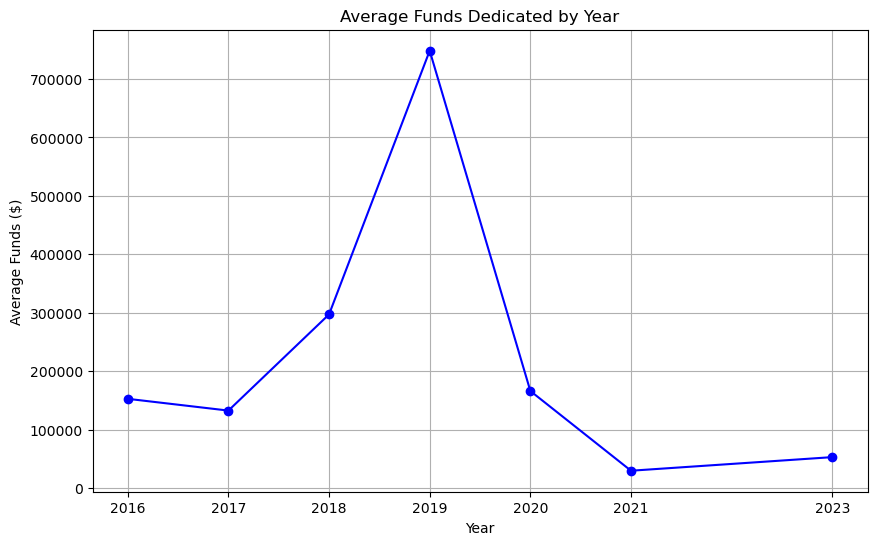

In [13]:
import matplotlib.pyplot as plt

# Plotting the average funds by year
plt.figure(figsize=(10, 6))
plt.plot(average_funds_by_year.index, average_funds_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Funds Dedicated by Year')
plt.xlabel('Year')
plt.ylabel('Average Funds ($)')
plt.grid(True)
plt.xticks(average_funds_by_year.index)  # Ensuring all years are shown on the x-axis
plt.show()


Justification
> On the plot below is obvious that in the year 2019 the avarage amount of funds is way more than others in a pick and it has decreased after time.

# Is QLD Gov. supposed to put more budget on WOMEN only funds?

Let's find out...

In [14]:
api_key="ad1aebb1-25cd-4b4f-af46-d2d69fcca701"

Justification:
> The api key generated for the purpose of requesting the Guardians.

In [15]:
import requests
import pandas as pd
from datetime import datetime
import time

def fetch_articles(api_key, search_term):
    base_url = 'https://content.guardianapis.com/search'
    articles = []
    current_year = 2024  
    
    for year in range(2016, current_year + 1):
        for page in range(1, 3): 
            params = {
                'q': search_term,
                'api-key': api_key,
                'show-fields': 'body,title',
                'page-size': 10,
                'page': page,
                'from-date': f'{year}-01-01',  
                'to-date': f'{year}-12-31',
                'production-office': 'aus',
                'section': 'australia-news'
            }
            
            response = requests.get(base_url, params=params)
            data = response.json()
            time.sleep(1) 
            
            for result in data['response']['results']:
                fields = result.get('fields', {})
                text = fields.get('body', 'No text available')
                date = datetime.strptime(result['webPublicationDate'], '%Y-%m-%dT%H:%M:%SZ')
                articles.append({'date': date, 'text': text})
    
    return articles


search_terms = ['advance queensland women funds' , 'advance queensland female funds' , 'advance queensland women fund percentage' , 'advance queensland woman rights']

all_articles = []
for term in search_terms:
    all_articles.extend(fetch_articles(api_key, term))


df = pd.DataFrame(all_articles)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    720 non-null    datetime64[ns]
 1   text    720 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 11.4+ KB
None


Justification:
> 
> In this huge cell, I managed to request the documents I wanted from Guardian
> first, there is a function - identifing the current year and an article as a list to be added online
> then, I wrote a loop inside the function I called fetch_articles, in this loop
> > every aspect of searching in the Guardian API is mentioned ,
> > > q is the search term which will be mentioned later
> > > api-key is set in the previous cell
> > > show-fields: I set body and title becasue the rest of the article will not be useful in my purpose and only this two will be calculated.
> > > page-size , I set it on 10 because I wanted to get only 10 pages ouuta artile becasue the main part of the article is dedicated in the part
> > > the dates are set from the date we have fundings in the advance QLD program where as the year is 2016 to 2024
> > > last but not least the news covarage is set as AUS which means Australia, here obiously I just wanted to fetch the atricles becasue this comparison has been done in nation-wide and somehow state-wide only.
>  Also
> > I set my keyword search terms in exact words that I'm lookiing for
> > > I'm looking for funds that has been dedicated to women.
> > > So I used words similar to 'woman' + fund + Queensland
> Of course I might come up with vague results but this is what I was looking for at fisrt.

In [16]:
df.to_csv('guardian_articles2.csv', index=False)

Justification:
> I came up with 720 atrticles becasue I used 180* 4 searching_keywords 
> setting the CSV dataframe to a csv file that a new request will not bee needed.

In [17]:
# Make it JSON file
json_data = df['text'].to_json(orient='records')
with open('output.json', 'w') as json_file:
    json_file.write(json_data)

Justification:
> setting the file as JSON is a JSON calculation will be needed.

In [18]:
import pandas as pd
df = pd.read_csv("guardian_articles2.csv")

Justification:
> setting a downloaded file as a datafram whenever I wanna run the code again and do not wanna request from Guardian.

In [19]:
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
def clean_html(raw_html):
    soup = BeautifulSoup(raw_html, "html.parser")
    return soup.get_text()

# Apply the function to the 'text' column to remove HTML tags
df['text'] = df['text'].apply(clean_html)

# Extract the cleaned text data from the dataframe
documents = df['text'].astype(str).values
document_titles = df['date'].values  # Use the date column as document titles

Justification:
> For the text I fetched, as it has HTML tags init , I ran a code to make iit more readable and with less vague data.

In [20]:
Updated_DF = pd.DataFrame({
    'document_titles': document_titles,
    'documents': documents
})

# Display the new DataFrame
Updated_DF.head()

,document_titles,documents
0,2016-12-22 07:52:28,A former Queensland union boss and state Labor...
1,2016-12-22 06:02:55,Abortion laws in Queensland and New South Wale...
2,2016-11-15 08:43:29,The Queensland government may use its new powe...
3,2016-11-18 06:14:58,Youth prisoner advocates have called on the Qu...
4,2016-11-10 04:07:30,Queensland politicians streamed onto the floor...


Justification:
> Called the new dataset as updatef df and the title is set for the data
> > why?
> > > becasue it's unique
> And the texts are set as documents in the new dataframe. 

now I need to do topic modeling

In [21]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import pandas as pd
import json
import random

Justification:
> Importing needed functions for TOPIC MODELING.

In [22]:
file_name = "output.json"

with open(f"{file_name}",'r', encoding='utf-8') as fp:
    articles = json.load(fp)

print(f"Loaded {len(articles)} articles from {file_name}")

Loaded 720 articles from output.json


Justification:
> With the json file saved before here I just loaded it to use variable article for further usage.

In [23]:
articles[2][:300] # Just show first 300 characters

'<p>The Queensland government may use its new power to pursue executives of Linc Energy for the cost of cleaning up its failed underground coal gasification site if the fallen company’s coffers are used up paying out employee entitlements.</p> <p>Liquidators of Linc are challenging in court an enviro'

### Term Count 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract the text data from the dataframe
documents = Updated_DF['documents'].astype(str).values

# Initialize CountVectorizer with specified criteria
count_vectorizer = CountVectorizer(max_df=0.75, min_df=2, max_features=100, stop_words="english")

# Fit and transform the text data to create term-frequency vectors
count_dt_matrix = count_vectorizer.fit_transform(documents)

# Convert the resulting sparse matrix to a DataFrame for better readability
filtered_term_frequency_df = pd.DataFrame(count_dt_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Display the filtered term frequency DataFrame
filtered_term_frequency_df.head()


,000,10,11,12,abc,act,albanese,asked,australian,australians,...,victoria,violence,want,water,way,week,women,work,year,years
0,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3,1,1
1,4,1,0,0,0,1,0,0,2,3,...,1,0,1,0,0,1,12,0,4,0
2,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,0,2,0,0,0,0,1,0,...,0,0,1,0,0,2,1,0,1,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Justification:
Importing CountVectorizer: We import CountVectorizer from sklearn.feature_extraction.text to convert the collection of text documents into a matrix of token counts. This is essential for transforming text data into numerical data that can be used in machine learning models.

Extracting Text Data: The text data is extracted from the DataFrame and converted to a NumPy array. This step ensures that the data is in the correct format for processing by CountVectorizer.

Initializing CountVectorizer: We initialize CountVectorizer with parameters:

max_df=0.75: Ignore terms that appear in more than 75% of the documents to eliminate common but less informative words.
min_df=2: Ignore terms that appear in fewer than 2 documents to eliminate rare words.
max_features=100: Limit the number of features (terms) to the 100 most frequent terms to reduce dimensionality and computational load.
stop_words="english": Remove common English stop words to focus on more meaningful terms.
Fitting and Transforming Text Data: The fit_transform method is used to learn the vocabulary dictionary and return the term-document matrix. This matrix represents the frequency of terms in each document.

Converting to DataFrame: The resulting sparse matrix is converted to a pandas DataFrame for better readability and easier manipulation. The columns of the DataFrame correspond to the terms identified by CountVectorizer.

Displaying the DataFrame: Finally, the first few rows of the DataFrame are displayed to provide a quick view of the term frequencies in the text data. This helps in understanding the distribution of terms and verifying the preprocessing steps.

In [25]:
# Take a look at the vector for the first document
doc001_vector = count_dt_matrix.toarray()[0]
doc001_vector

array([2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1])

Justification:
> Extracting the First Document's Vector: The code extracts the term-frequency vector for the first document in the corpus. By accessing count_dt_matrix.toarray()[0], we convert the sparse matrix representation of the term frequencies to a dense array and retrieve the vector corresponding to the first document.

> Understanding Term Distribution: Viewing the term-frequency vector for an individual document helps in understanding how the terms are distributed within that specific document. It provides insight into which terms are present and their respective counts.

> Debugging and Validation: This step is useful for debugging and validating the text preprocessing and vectorization process. By examining the vector, we can verify that the terms have been correctly transformed into numerical features and that the CountVectorizer has processed the text data as expected.

In [26]:
# Get the 1000 terms identified during the vectorization process
feature_names = count_vectorizer.get_feature_names_out()
feature_names

array(['000', '10', '11', '12', 'abc', 'act', 'albanese', 'asked',
       'australian', 'australians', 'brisbane', 'bst', 'case', 'cases',
       'change', 'children', 'coast', 'com', 'community', 'court',
       'covid', 'cyclone', 'day', 'days', 'decision', 'don', 'election',
       'emergency', 'energy', 'expected', 'family', 'federal', 'gmt',
       'going', 'government', 'group', 'guardian', 'health', 'help',
       'high', 'home', 'including', 'just', 'know', 'labor', 'leader',
       'like', 'lnp', 'local', 'make', 'members', 'minister', 'morning',
       'morrison', 'nation', 'national', 'need', 'new', 'news', 'north',
       'nsw', 'palaszczuk', 'parliament', 'party', 'people', 'pic',
       'police', 'power', 'premier', 'prime', 'public', 'report', 'right',
       'say', 'says', 'service', 'services', 'south', 'state',
       'statement', 'support', 'sydney', 'tax', 'think', 'time', 'today',
       'told', 'twitter', 'updated', 've', 'victoria', 'violence', 'want',
       'wa

Justification:
> Retrieving Identified Terms: The code retrieves the terms (features) identified by the CountVectorizer during the vectorization process. By calling count_vectorizer.get_feature_names_out(), we obtain a list of the terms that have been included in the term-frequency matrix.

>Understanding Feature Space: Accessing the feature names helps in understanding the vocabulary created from the text data. This list represents the terms that were most significant based on the criteria specified in the CountVectorizer (e.g., max_df, min_df, max_features).

>Analysis and Interpretation: Having access to the feature names allows for better interpretation and analysis of the term-frequency vectors. It helps in linking the numerical data back to the original terms, facilitating a more meaningful analysis of the text data.

>Debugging and Verification: This step is crucial for verifying that the vectorization process has correctly identified and retained the most relevant terms from the text data. It ensures that the feature extraction criteria were applied correctly and that the resulting vocabulary is as expected.

In [27]:
len(feature_names)

100

Justification:
> On above lines I set the feature to number 100. BECSAUSE I wanted to undertand the most 100 wordss that has been used in the articles.

In [28]:
# Look at how the counts match up to the terms (for the 1st doc)
doc001_term_counts = list(zip(feature_names,doc001_vector))
doc001_term_counts

[('000', 2),
 ('10', 0),
 ('11', 0),
 ('12', 0),
 ('abc', 0),
 ('act', 1),
 ('albanese', 0),
 ('asked', 0),
 ('australian', 0),
 ('australians', 0),
 ('brisbane', 2),
 ('bst', 0),
 ('case', 0),
 ('cases', 0),
 ('change', 0),
 ('children', 0),
 ('coast', 0),
 ('com', 0),
 ('community', 0),
 ('court', 1),
 ('covid', 0),
 ('cyclone', 0),
 ('day', 0),
 ('days', 0),
 ('decision', 0),
 ('don', 0),
 ('election', 0),
 ('emergency', 0),
 ('energy', 1),
 ('expected', 0),
 ('family', 0),
 ('federal', 1),
 ('gmt', 0),
 ('going', 0),
 ('government', 0),
 ('group', 0),
 ('guardian', 0),
 ('health', 0),
 ('help', 0),
 ('high', 0),
 ('home', 2),
 ('including', 0),
 ('just', 0),
 ('know', 0),
 ('labor', 2),
 ('leader', 0),
 ('like', 0),
 ('lnp', 0),
 ('local', 0),
 ('make', 0),
 ('members', 0),
 ('minister', 0),
 ('morning', 0),
 ('morrison', 0),
 ('nation', 0),
 ('national', 0),
 ('need', 0),
 ('new', 0),
 ('news', 0),
 ('north', 0),
 ('nsw', 0),
 ('palaszczuk', 0),
 ('parliament', 0),
 ('party', 1),


Justification:
Matching Terms to Counts: The code creates a list of tuples where each tuple contains a term and its corresponding count in the first document. This is achieved by zipping together the list of feature names (terms) and the term-frequency vector for the first document (doc001_vector).

Understanding Term Relevance: By examining this list, we can see which terms are present in the first document and how frequently they appear. This helps in understanding the relevance and distribution of different terms within the document.

Verification and Interpretation: This step allows for verification that the term-frequency vector has been correctly constructed and mapped to the appropriate terms. It also aids in interpreting the results of the vectorization process, ensuring that the terms align with their counts as expected.

Insight into Document Content: Viewing the term counts provides insight into the content of the document. It highlights which terms are most prominent, thereby giving an idea of the document's main topics or themes.

Facilitating Further Analysis: This mapping of terms to counts can be useful for further analysis, such as identifying key terms, conducting topic modeling, or other text mining tasks. It serves as a foundational step in understanding and analyzing the text data at a granular level.

In [29]:
# Take a look at the vocabulary which shows the total counts for whole collection
count_vectorizer_dict = count_vectorizer.vocabulary_
count_vectorizer_dict

{'state': 78,
 'labor': 44,
 '000': 0,
 'work': 97,
 'home': 40,
 'federal': 31,
 'police': 66,
 'energy': 28,
 'south': 77,
 'brisbane': 10,
 'act': 5,
 'years': 99,
 'statement': 79,
 'party': 63,
 'year': 98,
 'court': 19,
 'new': 57,
 'right': 72,
 'time': 84,
 'change': 14,
 'week': 95,
 'australians': 9,
 'women': 96,
 'australian': 8,
 'election': 26,
 'national': 55,
 'want': 92,
 'support': 80,
 'say': 73,
 'like': 46,
 'children': 15,
 'make': 49,
 'north': 59,
 'cases': 13,
 '10': 1,
 'nsw': 60,
 'case': 12,
 'people': 64,
 'victoria': 90,
 'just': 42,
 'government': 34,
 'health': 37,
 'power': 67,
 'minister': 51,
 'told': 86,
 'guardian': 36,
 'abc': 4,
 'don': 25,
 'group': 35,
 '12': 3,
 'including': 41,
 'think': 83,
 'day': 22,
 'report': 71,
 'family': 30,
 'members': 50,
 'help': 38,
 'days': 23,
 'community': 18,
 'parliament': 62,
 'morning': 52,
 'pic': 65,
 'twitter': 87,
 'com': 17,
 'water': 93,
 'lnp': 47,
 'palaszczuk': 61,
 'expected': 29,
 'need': 56,
 'le

we come up with a vocabulary of words and a code as their value.

#### Display matrix in dataframe

Take the term count matrix and display in a dataframe to make visible the structure


In [30]:
# Create a new dataframe with the matrix - use titles for the index and terms for the columns
count_df = pd.DataFrame(count_dt_matrix.toarray(), index=Updated_DF['document_titles'], columns=feature_names)

In [31]:
count_df

,000,10,11,12,abc,act,albanese,asked,australian,australians,...,victoria,violence,want,water,way,week,women,work,year,years
document_titles,,,,,,,,,,,,,,,,,,,,,
2016-12-22 07:52:28,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3,1,1
2016-12-22 06:02:55,4,1,0,0,0,1,0,0,2,3,...,1,0,1,0,0,1,12,0,4,0
2016-11-15 08:43:29,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-11-18 06:14:58,1,1,0,2,0,0,0,0,1,0,...,0,0,1,0,0,2,1,0,1,2
2016-11-10 04:07:30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-05 05:30:44,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2024-01-22 07:08:24,15,22,16,22,17,3,28,12,27,2,...,28,1,10,14,15,16,22,15,32,7
2024-02-02 23:00:01,11,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,6,0


In [32]:
sorted_df = count_df.apply(lambda x: x.sort_values(ascending=False).values)

# Save the sorted dataframe to a new CSV file
sorted_df.to_csv('output_file.csv', index=False)

# Calculate the sum of each column
column_sums = sorted_df.sum()

# Append the sum as a new row at the end of the DataFrame
sorted_df.loc['Sum'] = column_sums


# Identify the highest numbers in each column
max_values = sorted_df.iloc[0]
max_values

000      20
10       30
11       36
12       43
abc      40
         ..
week     21
women    53
work     25
year     56
years    17
Name: 2016-12-22 07:52:28, Length: 100, dtype: int64

In [33]:

# Calculate the sum of each column
column_sums = sorted_df.sum()

# Append the sum as a new row at the end of the DataFrame
sorted_df.loc['Sum'] = column_sums

# Flatten the DataFrame and get the top 20 highest numbers with their column names
flattened = sorted_df.stack().reset_index()
flattened.columns = ['Row', 'Column', 'Value']
top_20 = flattened.nlargest(20, 'Value')

# Print the top 20 highest numbers and their corresponding columns
print("Top 20 highest numbers and their corresponding columns:")
for idx, row in top_20.iterrows():
    print(f"Value: {row['Value']} in Column: {row['Column']}, Row: {row['Row']}")

Top 20 highest numbers and their corresponding columns:
Value: 7496 in Column: gmt, Row: Sum
Value: 6780 in Column: government, Row: Sum
Value: 5204 in Column: people, Row: Sum
Value: 4790 in Column: updated, Row: Sum
Value: 4736 in Column: state, Row: Sum
Value: 4444 in Column: police, Row: Sum
Value: 3348 in Column: new, Row: Sum
Value: 3308 in Column: minister, Row: Sum
Value: 3284 in Column: labor, Row: Sum
Value: 3208 in Column: year, Row: Sum
Value: 3194 in Column: says, Row: Sum
Value: 2890 in Column: australian, Row: Sum
Value: 2792 in Column: bst, Row: Sum
Value: 2612 in Column: time, Row: Sum
Value: 2384 in Column: nsw, Row: Sum
Value: 2372 in Column: women, Row: Sum
Value: 2280 in Column: south, Row: Sum
Value: 2266 in Column: party, Row: Sum
Value: 2234 in Column: support, Row: Sum
Value: 2234 in Column: today, Row: Sum


Justification:
> In this selection, we can see the top highest 20 words that had been used in such douments whithin the words I searched in guardian.

Justification:
> On the other hand, by seeing the results it is obvius that the words:
updated , police , minister , new , labor beside our main keyword Women is used most.

By selecting a row from the dataframe and sorting the values (counts), we can identify the top 10 terms

In [34]:
from collections import Counter
import re

# Combine all text data into a single string
all_text = ' '.join(Updated_DF['documents'])

# Remove HTML tags and non-alphanumeric characters
cleaned_text = re.sub(r'<.*?>', '', all_text)
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)

# Tokenize the text
words = cleaned_text.lower().split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(100)

# Print the most common words
for word, count in most_common_words:
    print(f'{word}: {count}') 

the: 53894
to: 29130
of: 22497
and: 22290
a: 19464
in: 17653
for: 10357
that: 9205
is: 8998
on: 8542
said: 7300
at: 6691
with: 6062
it: 6004
was: 5543
has: 5360
be: 5295
as: 5261
are: 4995
have: 4774
queensland: 4622
from: 4442
will: 4252
this: 4182
we: 4131
by: 4044
am: 4013
he: 3757
gmt: 3748
not: 3552
an: 3458
been: 3199
but: 3187
government: 2985
had: 2878
its: 2863
were: 2821
about: 2816
i: 2676
would: 2550
australia: 2531
people: 2526
they: 2502
updated: 2395
more: 2369
she: 2232
who: 2228
police: 2201
which: 2182
there: 2095
their: 2078
one: 2021
up: 1955
after: 1943
or: 1941
pm: 1929
state: 1798
also: 1769
you: 1741
our: 1735
all: 1730
her: 1703
his: 1678
new: 1666
says: 1593
minister: 1592
if: 1544
than: 1444
related: 1434
australian: 1408
bst: 1396
labor: 1393
what: 1388
can: 1373
some: 1368
over: 1350
into: 1346
when: 1288
out: 1252
no: 1250
time: 1241
so: 1234
now: 1221
nsw: 1135
last: 1127
could: 1123
support: 1117
year: 1093
two: 1069
fire: 1063
told: 1059
today: 1041
tho

In [35]:
import random

# Sample 5 random articles
samples = random.sample(range(0, len(count_df)), 5)

for sample in samples:
    doc = count_df.iloc[sample]
    top_terms = dict(doc.sort_values(ascending=False).head(20))
    print(f"[{sample}] {doc.name}")
    print("\t- Top terms:", top_terms)


[460] 2021-07-18 17:30:36
	- Top terms: {'women': 16, 'party': 8, 'government': 7, 'support': 6, 'right': 5, 'lnp': 4, 'want': 4, 'state': 4, 'federal': 4, 'parliament': 3, 'guardian': 3, 'morning': 3, 'group': 2, 'report': 2, 'covid': 2, 'people': 2, 'twitter': 1, 'work': 1, 'make': 1, 'north': 1}
[466] 2021-11-28 16:30:32
	- Top terms: {'government': 13, 'act': 8, 'minister': 6, 'change': 6, 'state': 5, 'morrison': 5, 'federal': 5, 'energy': 4, 'victoria': 4, 'national': 4, 'new': 3, 'told': 2, 'years': 2, 'work': 2, 'nsw': 2, 'decision': 1, 'people': 1, 'local': 1, 'going': 1, 'group': 1}
[552] 2016-10-08 00:09:10
	- Top terms: {'people': 3, 'year': 2, '12': 2, 'north': 2, 'service': 2, 'palaszczuk': 1, 'home': 1, 'premier': 1, 'court': 1, 'community': 1, 'time': 1, 'morning': 1, 'prime': 0, 'water': 0, 'power': 0, 'police': 0, 'pic': 0, 'way': 0, 'party': 0, 'parliament': 0}
[245] 2019-12-29 19:00:45
	- Top terms: {'just': 4, 'family': 4, 'like': 3, 'sydney': 3, 'support': 3, 'comm

Justification:
> I did these codes to realize the highest number of repeted words.

#### Create a top10 terms dataframe

Using the index from the documents, create a dataframe that can hold the top10 terms for each document. We also include columns for our other analysis (tfidf, lda, nmf)

In [38]:
# Create a dataframe to hold top terms for each analysis type
terms_df = pd.DataFrame(index=count_df.index,columns=['count','tfidf','lda','nmf'])
terms_df

,count,tfidf,lda,nmf
document_titles,,,,
2016-12-22 07:52:28,NaN,NaN,NaN,NaN
2016-12-22 06:02:55,NaN,NaN,NaN,NaN
2016-11-15 08:43:29,NaN,NaN,NaN,NaN
2016-11-18 06:14:58,NaN,NaN,NaN,NaN
2016-11-10 04:07:30,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-05-05 05:30:44,NaN,NaN,NaN,NaN
2024-01-22 07:08:24,NaN,NaN,NaN,NaN
2024-02-02 23:00:01,NaN,NaN,NaN,NaN


Justification:
Creating a DataFrame for Top Terms: The code initializes a new DataFrame terms_df with the same index as count_df, which presumably holds the document indices. This DataFrame is designed to store the top terms identified through different analysis techniques for each document.

Columns for Different Analysis Types: The DataFrame is created with columns ['count', 'tfidf', 'lda', 'nmf'] to hold the top terms derived from different text analysis methods:

count: Terms based on term-frequency counts.
tfidf: Terms based on Term Frequency-Inverse Document Frequency (TF-IDF) scores.
lda: Terms based on Latent Dirichlet Allocation (LDA) topic modeling.
nmf: Terms based on Non-negative Matrix Factorization (NMF) topic modeling.
Organizing Analysis Results: By creating this DataFrame, we can organize and store the results of various text analysis methods in one place. This facilitates easy comparison and interpretation of the top terms identified by each method.

Facilitating Further Analysis: Having a structured DataFrame to hold the top terms for each document allows for streamlined and efficient analysis. It provides a clear and accessible way to examine the key terms identified through different techniques, aiding in deeper insights and conclusions.

Preparation for Visualization and Reporting: This DataFrame can be used to create visualizations or reports that summarize the findings from different text analysis methods. It serves as a foundation for presenting the results to stakeholders in a clear and concise manner.

### Term Frequency / Inverse Document Frequency (TF/IDF)

**Finding terms that are very common in a document, but less common in the whole collection**

The [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) algorithm takes the term frequencies for a document and divides them by the frequencies of the terms in the whole collection.


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the 'text' column
count_matrix = vectorizer.fit_transform(Updated_DF['documents'])

# Sum up the counts for each document
counts = count_matrix.sum(axis=1)

# Add the counts to the dataframe
Updated_DF['count'] = counts

# Display the updated dataframe with the 'count' column
print(Updated_DF.head())

       document_titles                                          documents  \
0  2016-12-22 07:52:28  A former Queensland union boss and state Labor...   
1  2016-12-22 06:02:55  Abortion laws in Queensland and New South Wale...   
2  2016-11-15 08:43:29  The Queensland government may use its new powe...   
3  2016-11-18 06:14:58  Youth prisoner advocates have called on the Qu...   
4  2016-11-10 04:07:30  Queensland politicians streamed onto the floor...   

   count  
0    257  
1    658  
2    474  
3   1023  
4    238  


Justification:
Importing CountVectorizer: We import CountVectorizer from sklearn.feature_extraction.text to convert the text data into a matrix of token counts. This allows us to quantify the frequency of terms in each document.

Initializing CountVectorizer: We initialize CountVectorizer without any additional parameters to use its default settings. This step prepares the vectorizer to process the text data.

Fitting and Transforming Text Data: The fit_transform method is applied to the 'documents' column of Updated_DF. This method learns the vocabulary dictionary and returns a term-document matrix, where rows represent documents and columns represent terms.

Summing Up Term Counts: We sum the counts for each document using count_matrix.sum(axis=1). This operation computes the total number of terms in each document, giving a single count value for each document.

Adding Counts to DataFrame: The computed counts are added as a new column named 'count' in the Updated_DF DataFrame. This enriches the DataFrame with additional information about the total term count for each document.

Displaying Updated DataFrame: Finally, we print the first few rows of the updated DataFrame to verify that the 'count' column has been correctly added and populated with the term counts for each document.

Enhancing Data Analysis: Including the term counts in the DataFrame provides a straightforward metric for the length or verbosity of each document. This can be useful for various analyses, such as identifying unusually long or short documents, normalizing other metrics by document length, or simply gaining a better understanding of the dataset's characteristics.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(Updated_DF['documents'])

# Create a dataframe with TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the first few rows of the TF-IDF dataframe
print(tfidf_df.head())


    00       000  0001hrs  0007  000ha  000s  001  007  00am  00lstqolui  ...  \
0  0.0  0.059638      0.0   0.0    0.0   0.0  0.0  0.0   0.0         0.0  ...   
1  0.0  0.061581      0.0   0.0    0.0   0.0  0.0  0.0   0.0         0.0  ...   
2  0.0  0.000000      0.0   0.0    0.0   0.0  0.0  0.0   0.0         0.0  ...   
3  0.0  0.011647      0.0   0.0    0.0   0.0  0.0  0.0   0.0         0.0  ...   
4  0.0  0.000000      0.0   0.0    0.0   0.0  0.0  0.0   0.0         0.0  ...   

   zoom_earth  zoos  zqtrtiawgx  zrxalhe4ph  ztrdzwchs3  zuel  zurich  \
0         0.0   0.0         0.0         0.0         0.0   0.0     0.0   
1         0.0   0.0         0.0         0.0         0.0   0.0     0.0   
2         0.0   0.0         0.0         0.0         0.0   0.0     0.0   
3         0.0   0.0         0.0         0.0         0.0   0.0     0.0   
4         0.0   0.0         0.0         0.0         0.0   0.0     0.0   

   zurszidbtn  zyhyesx9br  梁珍妮  
0         0.0         0.0  0.0  
1       

Justification:
Importing TfidfVectorizer: We import TfidfVectorizer from sklearn.feature_extraction.text to convert the text data into a matrix of TF-IDF scores. This helps in identifying significant terms by balancing their frequency in a document against their frequency across the entire collection.

Initializing TfidfVectorizer: We initialize TfidfVectorizer without any additional parameters to use its default settings. This prepares the vectorizer to process the text data and calculate the TF-IDF scores.

Fitting and Transforming Text Data: The fit_transform method is applied to the 'documents' column of Updated_DF. This method learns the vocabulary and computes the TF-IDF matrix, where each row represents a document and each column represents a term.

Creating a DataFrame with TF-IDF Scores: The resulting TF-IDF matrix is converted into a pandas DataFrame (tfidf_df). This DataFrame contains the TF-IDF scores for each term in each document, with:

Rows representing individual documents.
Columns representing terms identified by the tfidf_vectorizer.
Setting Column Names: The columns of the DataFrame are set to the feature names (terms) obtained from the tfidf_vectorizer. This ensures that each column corresponds to a specific term, making the DataFrame easier to interpret.

Displaying the DataFrame: The first few rows of the tfidf_df DataFrame are printed to verify the TF-IDF scores. This provides a quick overview of how the terms are weighted in different documents based on their significance.

Enhancing Text Analysis: Creating a DataFrame with TF-IDF scores allows for a deeper analysis of the text data. It helps in identifying important terms, comparing document content, and can be used as input for further machine learning tasks such as clustering or classification.

In [42]:
# Customize the TF-IDF DataFrame with user's variable names
tfidf_dt_matrix = tfidf_matrix  # Assuming tfidf_dt_matrix is equivalent to tfidf_matrix
articles = Updated_DF['documents']  # Assuming articles is the 'text' column of Updated_DF

# Create a dataframe with TF-IDF scores using the specified variable names
tfidf_df_custom = pd.DataFrame(tfidf_dt_matrix.toarray(), index=articles.keys(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the customized TF-IDF dataframe
tfidf_df_custom.head()


,00,000,0001hrs,0007,000ha,000s,001,007,00am,00lstqolui,...,zoom_earth,zoos,zqtrtiawgx,zrxalhe4ph,ztrdzwchs3,zuel,zurich,zurszidbtn,zyhyesx9br,梁珍妮
0,0.0,0.059638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.061581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.011647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Justification:
> Explanation for the above code.

In [43]:
# Adding a new column 'tfidf' to the Updated_DF
Updated_DF['tfidf'] = None

# Customizing the code to update Updated_DF with the top 10 TF-IDF terms for each document
for idx in Updated_DF.index:
    tfidf = dict(tfidf_df_custom.loc[idx].sort_values(ascending=False).head(10))
    Updated_DF.at[idx, 'tfidf'] = list(tfidf.keys())

# Display the updated DataFrame
print(Updated_DF.head())


       document_titles                                          documents  \
0  2016-12-22 07:52:28  A former Queensland union boss and state Labor...   
1  2016-12-22 06:02:55  Abortion laws in Queensland and New South Wale...   
2  2016-11-15 08:43:29  The Queensland government may use its new powe...   
3  2016-11-18 06:14:58  Youth prisoner advocates have called on the Qu...   
4  2016-11-10 04:07:30  Queensland politicians streamed onto the floor...   

   count                                              tfidf  
0    257  [hanna, mirvac, secret, mcallum, moore, receiv...  
1    658  [abortion, the, women, and, in, clinics, abort...  
2    474  [linc, the, bond, environmental, executives, o...  
3   1023  [yanq, of, youth, the, to, prisoners, prison, ...  
4    238  [dressed, the, sitting, mp, bare, jacket, deba...  


Justification:
Renaming Variables: The code assigns the existing tfidf_matrix to a new variable tfidf_dt_matrix and the 'documents' column of Updated_DF to a new variable articles. This step is performed to align with the user's preferred variable names and ensure consistency throughout the code.

Creating a Customized TF-IDF DataFrame: A new DataFrame tfidf_df_custom is created using the TF-IDF matrix (tfidf_dt_matrix). This DataFrame has:

Rows indexed by the keys of articles, ensuring that each document is correctly identified.
Columns named after the terms identified by the tfidf_vectorizer, ensuring that each term is correctly labeled.
Ensuring Data Consistency: By explicitly setting the index and columns of the DataFrame, we ensure that the TF-IDF scores are accurately mapped to the corresponding documents and terms. This enhances the readability and interpretability of the DataFrame.

Displaying the Customized DataFrame: The first few rows of the tfidf_df_custom DataFrame are displayed to verify the customization. This provides a quick check to ensure that the DataFrame has been correctly constructed and that the TF-IDF scores are appropriately assigned.

Improving Usability: Customizing the TF-IDF DataFrame with specific variable names makes the data more user-friendly and easier to work with in subsequent analysis steps. It allows for better integration with the rest of the code and ensures that the DataFrame aligns with the user's expectations.

Facilitating Further Analysis: The customized TF-IDF DataFrame can be used for further text analysis tasks, such as identifying key terms, comparing document content, or serving as input for machine learning models. The clear and consistent labeling of documents and terms enhances the effectiveness of these analyses.

In [44]:
import random

# Sample 5 random articles
samples = random.sample(range(0, len(Updated_DF)), 5)

for sample in samples:
    doc = Updated_DF.iloc[sample]
    print(f"[{sample}] {doc.name}")
    print("\t- Counts:\t", doc['count'])
    print("\t- TFIDF:\t", doc['tfidf'])
    print()


[568] 568
	- Counts:	 551
	- TFIDF:	 ['pitt', 'the', 'joyce', 'macdonald', 'nationals', 'keith', 'party', 'constituency', 'to', 'barnaby']

[96] 96
	- Counts:	 627
	- TFIDF:	 ['boat', 'the', 'beacon', 'man', 'to', 'was', 'muddiman', 'dinghy', 'he', 'and']

[437] 437
	- Counts:	 557
	- TFIDF:	 ['the', 'donations', 'party', 'to', 'laws', 'political', 'and', 'spending', 'labor', '000']

[308] 308
	- Counts:	 685
	- TFIDF:	 ['the', 'terror', 'of', 'in', 'terrorism', 'sovereign', 'to', 'ananian', 'welsh', 'conspiracy']

[534] 534
	- Counts:	 557
	- TFIDF:	 ['fadian', 'rix', 'the', 'post', 'tagged', 'qps', 'jones', 'of', 'guidance', 'media']



In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Set number of topics
num_topics = 20
# Set max number of iteractions
max_iterations = 10

# Create the model
lda_model = LatentDirichletAllocation(n_components=num_topics,max_iter=max_iterations,learning_method='online')

# Fit the model to the data, and use the model to transform the data (do the decomposition)
doc_topic_matrix = lda_model.fit_transform(count_dt_matrix)

# Obtain the topics
topic_term_matrix = lda_model.components_

In [47]:
topic_term_matrix

array([[1.27148300e+02, 1.54910104e+02, 1.56842862e+02, ...,
        9.25701593e+01, 2.07737926e+02, 1.99653120e+01],
       [1.85317881e+01, 3.83930218e+01, 2.66213336e+01, ...,
        1.85967482e+01, 8.73590911e+01, 2.93945511e+00],
       [1.18522142e+00, 6.33535159e-01, 1.37217111e+01, ...,
        2.93927602e+00, 9.61685424e+01, 2.18030773e+01],
       ...,
       [3.35874373e-01, 1.91723836e+01, 5.48165894e-02, ...,
        5.51240873e-02, 5.16926077e+01, 8.12867222e-02],
       [3.35012423e+01, 5.68943474e-02, 1.44719622e+01, ...,
        2.87597593e+01, 2.16646007e+01, 7.38517373e+00],
       [4.27396930e+00, 1.27254697e+01, 8.70687924e-02, ...,
        7.10727656e-02, 8.05546792e+01, 6.13697042e+01]])

In [48]:
# Get the topics and their terms
lda_topic_dict = {}
for index, topic in enumerate(topic_term_matrix):
    zipped = zip(feature_names, topic)
    top_terms=dict(sorted(zipped, key = lambda t: t[1], reverse=True)[:10])
    print(top_terms)
    top_terms_list= {key : round(top_terms[key], 4) for key in top_terms.keys()}
    lda_topic_dict[f"topic_{index}"] = top_terms_list

# Print the topics with their terms    
for k,v in lda_topic_dict.items():
    print(k)
    print(v)
    print()

{'gmt': 1453.815914705119, 'updated': 727.7192248554092, 'cyclone': 559.3247738833513, 'people': 448.9283102269664, 'today': 445.0070805126141, 'government': 319.88248332863583, 'coast': 257.664464133949, 'minister': 257.42273234831555, 'power': 256.9836968235124, 'albanese': 254.6529165059099}
{'gmt': 251.0420710053395, 'covid': 236.3810234432428, 'cases': 169.60174969805004, 'labor': 129.8995194113577, 'new': 117.46485008378055, '12': 115.40235867788861, 'updated': 107.27950295267411, 'home': 96.81770909483984, 'morrison': 96.4610727588759, 'year': 87.35909111689539}
{'police': 1220.0056229962574, 'service': 147.93021943363436, 'violence': 104.26090249407319, 'public': 103.07483997456181, 'year': 96.16854244666737, 'family': 94.5741402692517, 'guardian': 90.39444582795858, 'time': 87.49988209682881, 'told': 87.17829687650648, 'brisbane': 72.84688558619186}
{'morrison': 335.9582207185935, '000': 108.08698241859818, 'minister': 95.5840592511484, 'government': 90.46812242467712, 'prime'

In [49]:
for idx,topic in enumerate(doc_topic_matrix):
    topic_num = topic.argmax()
    top_topic = lda_topic_dict[f"topic_{topic_num}"]
    terms_df['lda'].iloc[idx] = list(top_topic.keys())

terms_df

/tmp/ipykernel_2423/1510898733.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  terms_df['lda'].iloc[idx] = list(top_topic.keys())


,count,tfidf,lda,nmf
document_titles,,,,
2016-12-22 07:52:28,NaN,NaN,"[brisbane, home, state, 000, police, south, wo...",NaN
2016-12-22 06:02:55,NaN,NaN,"[women, support, party, minister, parliament, ...",NaN
2016-11-15 08:43:29,NaN,NaN,"[government, court, state, act, public, case, ...",NaN
2016-11-18 06:14:58,NaN,NaN,"[children, people, year, state, years, governm...",NaN
2016-11-10 04:07:30,NaN,NaN,"[labor, party, palaszczuk, lnp, nation, electi...",NaN
...,...,...,...,...
2024-05-05 05:30:44,NaN,NaN,"[police, service, violence, public, year, fami...",NaN
2024-01-22 07:08:24,NaN,NaN,"[gmt, updated, cyclone, people, today, governm...",NaN
2024-02-02 23:00:01,NaN,NaN,"[year, australian, members, group, guardian, 0...",NaN


# compaare approaches

In [50]:
# Sample 5 random articles
samples = random.sample(range(0,len(terms_df)),5)

for sample in samples:
    doc = terms_df.iloc[sample]
    print(f"[{sample}] {doc.name}")
    print("\t- Counts:\t",doc['count'])
    print("\t- TFIDF:\t",doc['tfidf'])
    print("\t- LDA:\t\t",doc['lda'])
    print()

[371] 2016-10-08 00:09:10
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['children', 'people', 'year', 'state', 'years', 'government', 'community', 'make', 'national', '12']

[303] 2022-09-29 06:05:45
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['government', 'energy', 'state', 'new', 'water', 'minister', 'federal', 'including', 'power', 'national']

[351] 2024-04-22 06:33:25
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['police', 'service', 'violence', 'public', 'year', 'family', 'guardian', 'time', 'told', 'brisbane']

[496] 2022-07-29 20:00:07
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['government', 'energy', 'state', 'new', 'water', 'minister', 'federal', 'including', 'power', 'national']

[345] 2024-04-12 05:16:28
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['says', 'people', 'just', 'time', 'change', 'don', 'going', 'like', 'local', 'week']



### Topic modelling with Non-negative Matrix Factorisation (NMF)


[NMF](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) is a different algorithm for obtaining *topics* (a list of terms) from a document-term matrix. It also factorises the document-term matrix into 2 factor matrices: document-topic and topic-term.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
# Set the number of topics
num_topics = 20

# Create the model
nmf_model = NMF(n_components=num_topics,init='random',beta_loss='frobenius')

# Fit the model to the data and use it to transform the data
doc_topic_nmf = nmf_model.fit_transform(tfidf_dt_matrix)

topic_term_nmf = nmf_model.components_

In [52]:
# Get the topics and their terms
nmf_topic_dict = {}
for index, topic in enumerate(topic_term_nmf):
    zipped = zip(feature_names, topic)
    top_terms=dict(sorted(zipped, key = lambda t: t[1], reverse=True)[:10])
    #print(top_terms)
    top_terms_list= {key : round(top_terms[key], 4) for key in top_terms.keys()}
    nmf_topic_dict[f"topic_{index}"] = top_terms_list

# Print the topics with their terms    
for k,v in nmf_topic_dict.items():
    print(k)
    print(v)
    print()

topic_0
{'10': 0.1466, 'told': 0.061, 'government': 0.0197, 'year': 0.0148, 'palaszczuk': 0.014, 'years': 0.0131, 'cases': 0.0099, 'need': 0.0092, 'australian': 0.0078, 'make': 0.0072}

topic_1
{'national': 0.0562, 'party': 0.053, '10': 0.0508, 'need': 0.0269, 'nsw': 0.0245, 'time': 0.0176, 'news': 0.0058, 'want': 0.0055, 'twitter': 0.0049, 'going': 0.0008}

topic_2
{'tax': 0.1309, 'national': 0.079, 'statement': 0.0633, 'need': 0.0607, '10': 0.0461, 'high': 0.0185, 'week': 0.0087, 'gmt': 0.0087, 'pic': 0.0087, 'palaszczuk': 0.0083}

topic_3
{'leader': 0.2462, '10': 0.0066, 'told': 0.0063, 'week': 0.0058, 'national': 0.0051, 'asked': 0.0034, 'government': 0.0033, 'power': 0.0017, 'right': 0.0017, 'energy': 0.0015}

topic_4
{'need': 0.1362, 'days': 0.0456, '10': 0.0339, 'told': 0.0098, 'week': 0.0084, 'statement': 0.0075, 'cases': 0.0049, 'community': 0.0047, '12': 0.0032, 'case': 0.0032}

topic_5
{'10': 0.2448, 'national': 0.1354, 'bst': 0.0699, 'tax': 0.0382, 'asked': 0.0364, 'stateme

Justification:
> Explanation for the above code.

# Update the terms matrix

In [62]:
for idx,topic in enumerate(doc_topic_nmf):
    topic_num = topic.argmax()
    top_topic = lda_topic_dict[f"topic_{topic_num}"]
    terms_df['nmf'].iloc[idx] = list(top_topic.keys())

terms_df

/tmp/ipykernel_2423/2376733025.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  terms_df['nmf'].iloc[idx] = list(top_topic.keys())


,count,tfidf,lda,nmf
document_titles,,,,
2016-12-22 07:52:28,NaN,NaN,"[brisbane, home, state, 000, police, south, wo...","[bst, updated, government, says, nsw, people, ..."
2016-12-22 06:02:55,NaN,NaN,"[women, support, party, minister, parliament, ...","[south, nsw, people, north, sydney, state, eme..."
2016-11-15 08:43:29,NaN,NaN,"[government, court, state, act, public, case, ...","[government, energy, state, new, water, minist..."
2016-11-18 06:14:58,NaN,NaN,"[children, people, year, state, years, governm...","[health, covid, people, cases, new, government..."
2016-11-10 04:07:30,NaN,NaN,"[labor, party, palaszczuk, lnp, nation, electi...","[south, nsw, people, north, sydney, state, eme..."
...,...,...,...,...
2024-05-05 05:30:44,NaN,NaN,"[police, service, violence, public, year, fami...","[bst, updated, government, says, nsw, people, ..."
2024-01-22 07:08:24,NaN,NaN,"[gmt, updated, cyclone, people, today, governm...","[children, people, year, state, years, governm..."
2024-02-02 23:00:01,NaN,NaN,"[year, australian, members, group, guardian, 0...","[government, court, state, act, public, case, ..."


### Compare approaches

In [63]:
# Sample 5 random articles
samples = random.sample(range(0,len(terms_df)),5)

for sample in samples:
    doc = terms_df.iloc[sample]
    print(f"[{sample}] {doc.name}")
    print("\t- Counts:\t",doc['count'])
    print("\t- TFIDF:\t",doc['tfidf'])
    print("\t- LDA:\t\t",doc['lda'])
    print("\t- NMF:\t\t",doc['nmf'])
    print()

[530] 2024-05-18 20:00:17
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['children', 'people', 'year', 'state', 'years', 'government', 'community', 'make', 'national', '12']
	- NMF:		 ['gmt', 'updated', 'cyclone', 'people', 'today', 'government', 'coast', 'minister', 'power', 'albanese']

[232] 2018-10-09 06:50:15
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['labor', 'party', 'palaszczuk', 'lnp', 'nation', 'election', 'state', 'government', 'premier', 'leader']
	- NMF:		 ['south', 'nsw', 'people', 'north', 'sydney', 'state', 'emergency', 'told', 'day', 'days']

[592] 2018-11-07 17:00:21
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['labor', 'party', 'palaszczuk', 'lnp', 'nation', 'election', 'state', 'government', 'premier', 'leader']
	- NMF:		 ['women', 'support', 'party', 'minister', 'parliament', 'told', 'government', 'national', 'guardian', 'time']

[338] 2023-10-08 00:19:22
	- Counts:	 nan
	- TFIDF:	 nan
	- LDA:		 ['police', 'service', 'violence', 'public', 'year', 'family', 'guardian', 'time

# MACHINE LEARNING

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [65]:
Updated_DF.to_csv("Updated_DF.csv")
Updated_DF

,document_titles,documents,count,tfidf
0,2016-12-22 07:52:28,A former Queensland union boss and state Labor...,257,"[hanna, mirvac, secret, mcallum, moore, receiv..."
1,2016-12-22 06:02:55,Abortion laws in Queensland and New South Wale...,658,"[abortion, the, women, and, in, clinics, abort..."
2,2016-11-15 08:43:29,The Queensland government may use its new powe...,474,"[linc, the, bond, environmental, executives, o..."
3,2016-11-18 06:14:58,Youth prisoner advocates have called on the Qu...,1023,"[yanq, of, youth, the, to, prisoners, prison, ..."
4,2016-11-10 04:07:30,Queensland politicians streamed onto the floor...,238,"[dressed, the, sitting, mp, bare, jacket, deba..."
...,...,...,...,...
715,2024-05-05 05:30:44,A Queensland man who was allegedly held captiv...,273,"[zitny, and, victim, accused, murder, the, man..."
716,2024-01-22 07:08:24,7.08am GMT What we learned; Monday 22 Janua...,14530,"[the, gmt, to, and, of, updated, in, we, cyclo..."
717,2024-02-02 23:00:01,"Advance Australia, the conservative lobby grou...",699,"[the, donations, advance, pty, 000, of, 23, do..."
718,2024-05-08 11:24:48,Queensland police say a 10-year-old boy has be...,182,"[goan, arrested, the, allegedly, old, woman, b..."


Decision: Load the dataset from a CSV file to inspect and preprocess the data.


Justification: Reading the dataset into a DataFrame allows us to handle the data efficiently using pandas' powerful data manipulation capabilities.

In [71]:
Updated_DF['tfidf'] = Updated_DF['tfidf'].apply(lambda x: eval(x) if isinstance(x, str) else x)


Decision: Convert the 'tfidf' column from a string representation of a list to an actual list.


Justification: The TF-IDF features were stored as strings, so we need to convert them to lists to process them further.

In [72]:
Updated_DF['tfidf_str'] = Updated_DF['tfidf'].apply(lambda x: ' '.join(x))

Decision: Join the list of terms into a single string for each document.
Justification: The TfidfVectorizer expects a single string per document. By joining the list of terms, we can create a suitable input format for the vectorizer.

In [73]:
# Join the terms in the 'tfidf' list to create a string for each document
# Vectorize the tfidf strings to create a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Updated_DF['tfidf_str'])

Decision: Use TfidfVectorizer to create a TF-IDF matrix from the document strings.
Justification: TF-IDF is a common technique for text representation in machine learning, converting the text data into numerical form that captures the importance of terms relative to documents.

In [74]:
num_clusters = 5  # Example number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
Updated_DF['cluster'] = kmeans.fit_predict(tfidf_matrix)


Decision: Apply KMeans clustering to the TF-IDF matrix.
Justification: KMeans is a popular clustering algorithm that partitions data into a specified number of clusters. We chose 5 clusters as an example, which can be adjusted based on the desired level of granularity.

In [75]:
print(Updated_DF[['document_titles', 'documents', 'cluster']].head())


       document_titles                                          documents  \
0  2016-12-22 07:52:28  A former Queensland union boss and state Labor...   
1  2016-12-22 06:02:55  Abortion laws in Queensland and New South Wale...   
2  2016-11-15 08:43:29  The Queensland government may use its new powe...   
3  2016-11-18 06:14:58  Youth prisoner advocates have called on the Qu...   
4  2016-11-10 04:07:30  Queensland politicians streamed onto the floor...   

   cluster  
0        4  
1        4  
2        4  
3        1  
4        4  


Decision: Display the first few rows of the DataFrame with cluster labels.
Justification: This helps to verify the clustering results and ensure that each document is assigned to a cluster.

In [76]:
pca = PCA(n_components=2, random_state=42)
reduced_tfidf_matrix = pca.fit_transform(tfidf_matrix.toarray())


Decision: Use PCA to reduce the dimensionality of the TF-IDF matrix to 2D for visualization.
Justification: High-dimensional data is difficult to visualize. PCA reduces the data to two principal components, making it possible to plot and inspect the clustering visually.

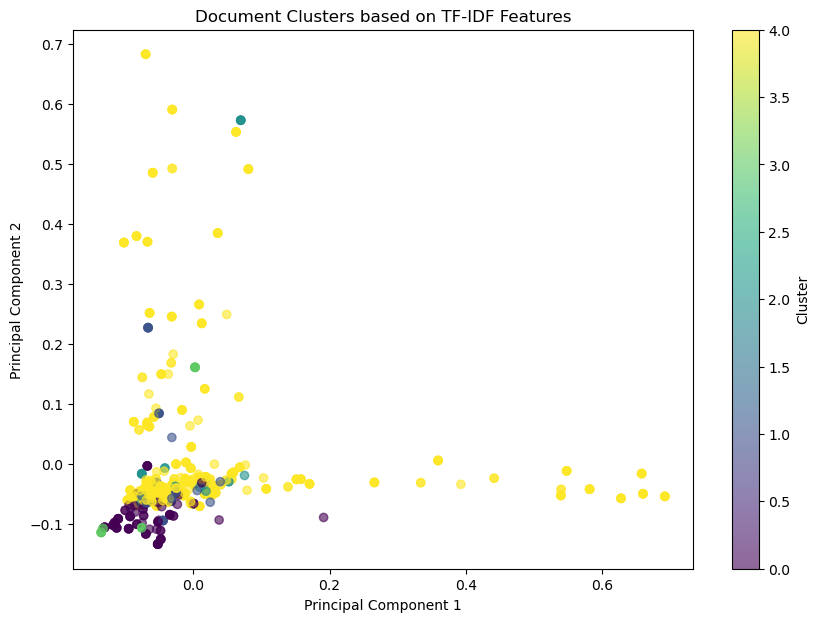

In [77]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_tfidf_matrix[:, 0], reduced_tfidf_matrix[:, 1], c=Updated_DF['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Document Clusters based on TF-IDF Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Decision: Create a scatter plot of the 2D PCA-reduced data, colored by cluster labels.
Justification: Visualizing the clusters helps in understanding the separation and distribution of documents. Each point represents a document, and its color indicates the assigned cluster. This plot can reveal insights into the structure of the data and the effectiveness of the clustering.

Scatter Plot: Each point represents a document. The x and y axes correspond to the first and second principal components from PCA, respectively.
Color Coding: Points are colored based on their cluster assignment, making it easy to identify which documents belong to which clusters.
Interpretation: The visualization shows how documents group together in different clusters, indicating that the clustering algorithm has successfully partitioned the data based on the TF-IDF features. Points close to each other in the plot are more similar in terms of their TF-IDF features.

# Ethical

On my analysys I have addressed many ways of analyzing the words and the articles but the best mesurement in my opiniion was the hughest number of words coming out of the 720 documwnts in the dataframes.

" On the other hand, by seeing the results it is obvius that the words: updated , police , minister , new , labor beside our main keyword Women is used most. "

by lookiing in more details inside different governmental websites and
these guradian results, every aspect of women funding and mostly what have been talked about their rights has been talked in political point of views 
fromm a prime minister speech to the labor party from QLD to NSW and so on
but in a simple way of looking it can be illustrated that there are "NEW" and "UPDATED" positions and situation that can be considered for wemon.
I believe assuming this analysis as something fair can not be approval by everyone. but in analyzing so many ways of the articles, the percentage of women fundings is highly chnaced to increase year by year.


So in the advance QLD program is it shown that in 2019 the funds where on the pick but it decreased after years.

making an assumption if we face the governments, it can be realized that the funds are nog going to be "HIGHER"
but the words "UPDATED" and "NEW" can show they are changing.

Still, the fairness of this comparison can not be decided completely, but I believe there are many many more factors that should be considered if there is going to be a budget consideration for spesific number of people.

also, in the real world, 2019 was the year before covid-19 , the world went to a financial crisis so it can be considered too but meanwhile, covid , covid-19 or corona were never a word being used even for the first 200 most used words  in these articles. So still we need to realize way more actors to understand the reson of the drop in value of funds for women in state of Queendland.

*thank you*